# Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Data Import

In [2]:
# Load data into dataframes
df_female = pd.read_csv('data/remaining-life-expectancy-at-different-ages-females.csv', sep=',', engine='python')
df_male = pd.read_csv('data/remaining-life-expectancy-at-different-ages-males.csv', sep=',', engine='python')

# Merge the datasets on common columns
df = pd.merge(df_female, df_male, on=['Entity', 'Code', 'Year'])

# 1 EDA

In [3]:
print(df.describe())
print(df.info())
df.head()

               Year  Life expectancy - Type: period - Sex: female - Age: 0  \
count  19922.000000                                       19922.000000       
mean    1978.822658                                          64.878746       
std       32.814514                                          12.851353       
min     1751.000000                                          12.721000       
25%     1963.000000                                          55.597550       
50%     1983.000000                                          67.495250       
75%     2002.000000                                          75.135850       
max     2021.000000                                          88.727200       

       Life expectancy - Type: period - Sex: female - Age: 10  \
count                                       19922.000000        
mean                                           61.096598        
std                                             7.568866        
min                                  

,Entity,Code,Year,Life expectancy - Type: period - Sex: female - Age: 0,Life expectancy - Type: period - Sex: female - Age: 10,Life expectancy - Type: period - Sex: female - Age: 15,Life expectancy - Type: period - Sex: female - Age: 25,Life expectancy - Type: period - Sex: female - Age: 45,Life expectancy - Type: period - Sex: female - Age: 65,Life expectancy - Type: period - Sex: female - Age: 80,Life expectancy - Type: period - Sex: male - Age: 0,Life expectancy - Type: period - Sex: male - Age: 10,Life expectancy - Type: period - Sex: male - Age: 15,Life expectancy - Type: period - Sex: male - Age: 25,Life expectancy - Type: period - Sex: male - Age: 45,Life expectancy - Type: period - Sex: male - Age: 65,Life expectancy - Type: period - Sex: male - Age: 80
0,Afghanistan,AFG,1950,28.3905,39.6348,36.2373,30.3781,19.4773,8.8115,3.8428,27.1286,38.8313,35.1167,28.7565,17.6553,8.2560,3.6406
1,Afghanistan,AFG,1951,28.6345,39.7867,36.3803,30.4994,19.5515,8.8514,3.8617,27.3639,38.9712,35.2498,28.8722,17.7276,8.2916,3.6579
2,Afghanistan,AFG,1952,29.1260,40.0921,36.6677,30.7432,19.7009,8.9318,3.9001,27.8377,39.2409,35.5062,29.0945,17.8641,8.3567,3.6886
3,Afghanistan,AFG,1953,29.6212,40.3987,36.9563,30.9883,19.8515,9.0131,3.9389,28.3146,39.4976,35.7500,29.3052,17.9906,8.4144,3.7145
4,Afghanistan,AFG,1954,29.9004,40.4510,37.0267,31.0654,19.9064,9.0529,3.9661,28.6239,39.5728,35.8393,29.3954,18.0445,8.4412,3.7303


### 1.1.1 missing values

In [4]:
# Count of missing values in each column
missing_values_count = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values_count)


Entity                                                       0
Code                                                      1600
Year                                                         0
Life expectancy - Type: period - Sex: female - Age: 0        0
Life expectancy - Type: period - Sex: female - Age: 10       0
Life expectancy - Type: period - Sex: female - Age: 15       0
Life expectancy - Type: period - Sex: female - Age: 25       0
Life expectancy - Type: period - Sex: female - Age: 45       0
Life expectancy - Type: period - Sex: female - Age: 65       0
Life expectancy - Type: period - Sex: female - Age: 80       0
Life expectancy - Type: period - Sex: male - Age: 0          0
Life expectancy - Type: period - Sex: male - Age: 10         0
Life expectancy - Type: period - Sex: male - Age: 15         0
Life expectancy - Type: period - Sex: male - Age: 25         0
Life expectancy - Type: period - Sex: male - Age: 45         0
Life expectancy - Type: period - Sex: male - Age: 65   

In [5]:
# Filter the DataFrame to show only rows where 'Code' is missing
missing_code_df = df[df['Code'].isnull()]

# Select unique 'Entity' values from these rows
unique_entities_with_missing_code = missing_code_df['Entity'].unique()

# Display the unique entities
print(unique_entities_with_missing_code)


['Africa (UN)' 'Asia (UN)' 'England and Wales' 'Europe (UN)'
 'High-income countries' 'Land-locked Developing Countries (LLDC)'
 'Latin America and the Caribbean (UN)' 'Least developed countries'
 'Less developed regions' 'Less developed regions, excluding China'
 'Less developed regions, excluding least developed countries'
 'Low-income countries' 'Lower-middle-income countries'
 'Middle-income countries' 'More developed regions'
 'No income group available' 'Northern America (UN)' 'Northern Ireland'
 'Oceania (UN)' 'Scotland' 'Small Island Developing States (SIDS)'
 'Upper-middle-income countries']


In [6]:
# Remove rows with any missing values in any column because these variables are already present in other countries
df_cleaned = df.dropna()

## 1.1 Trend Analysis

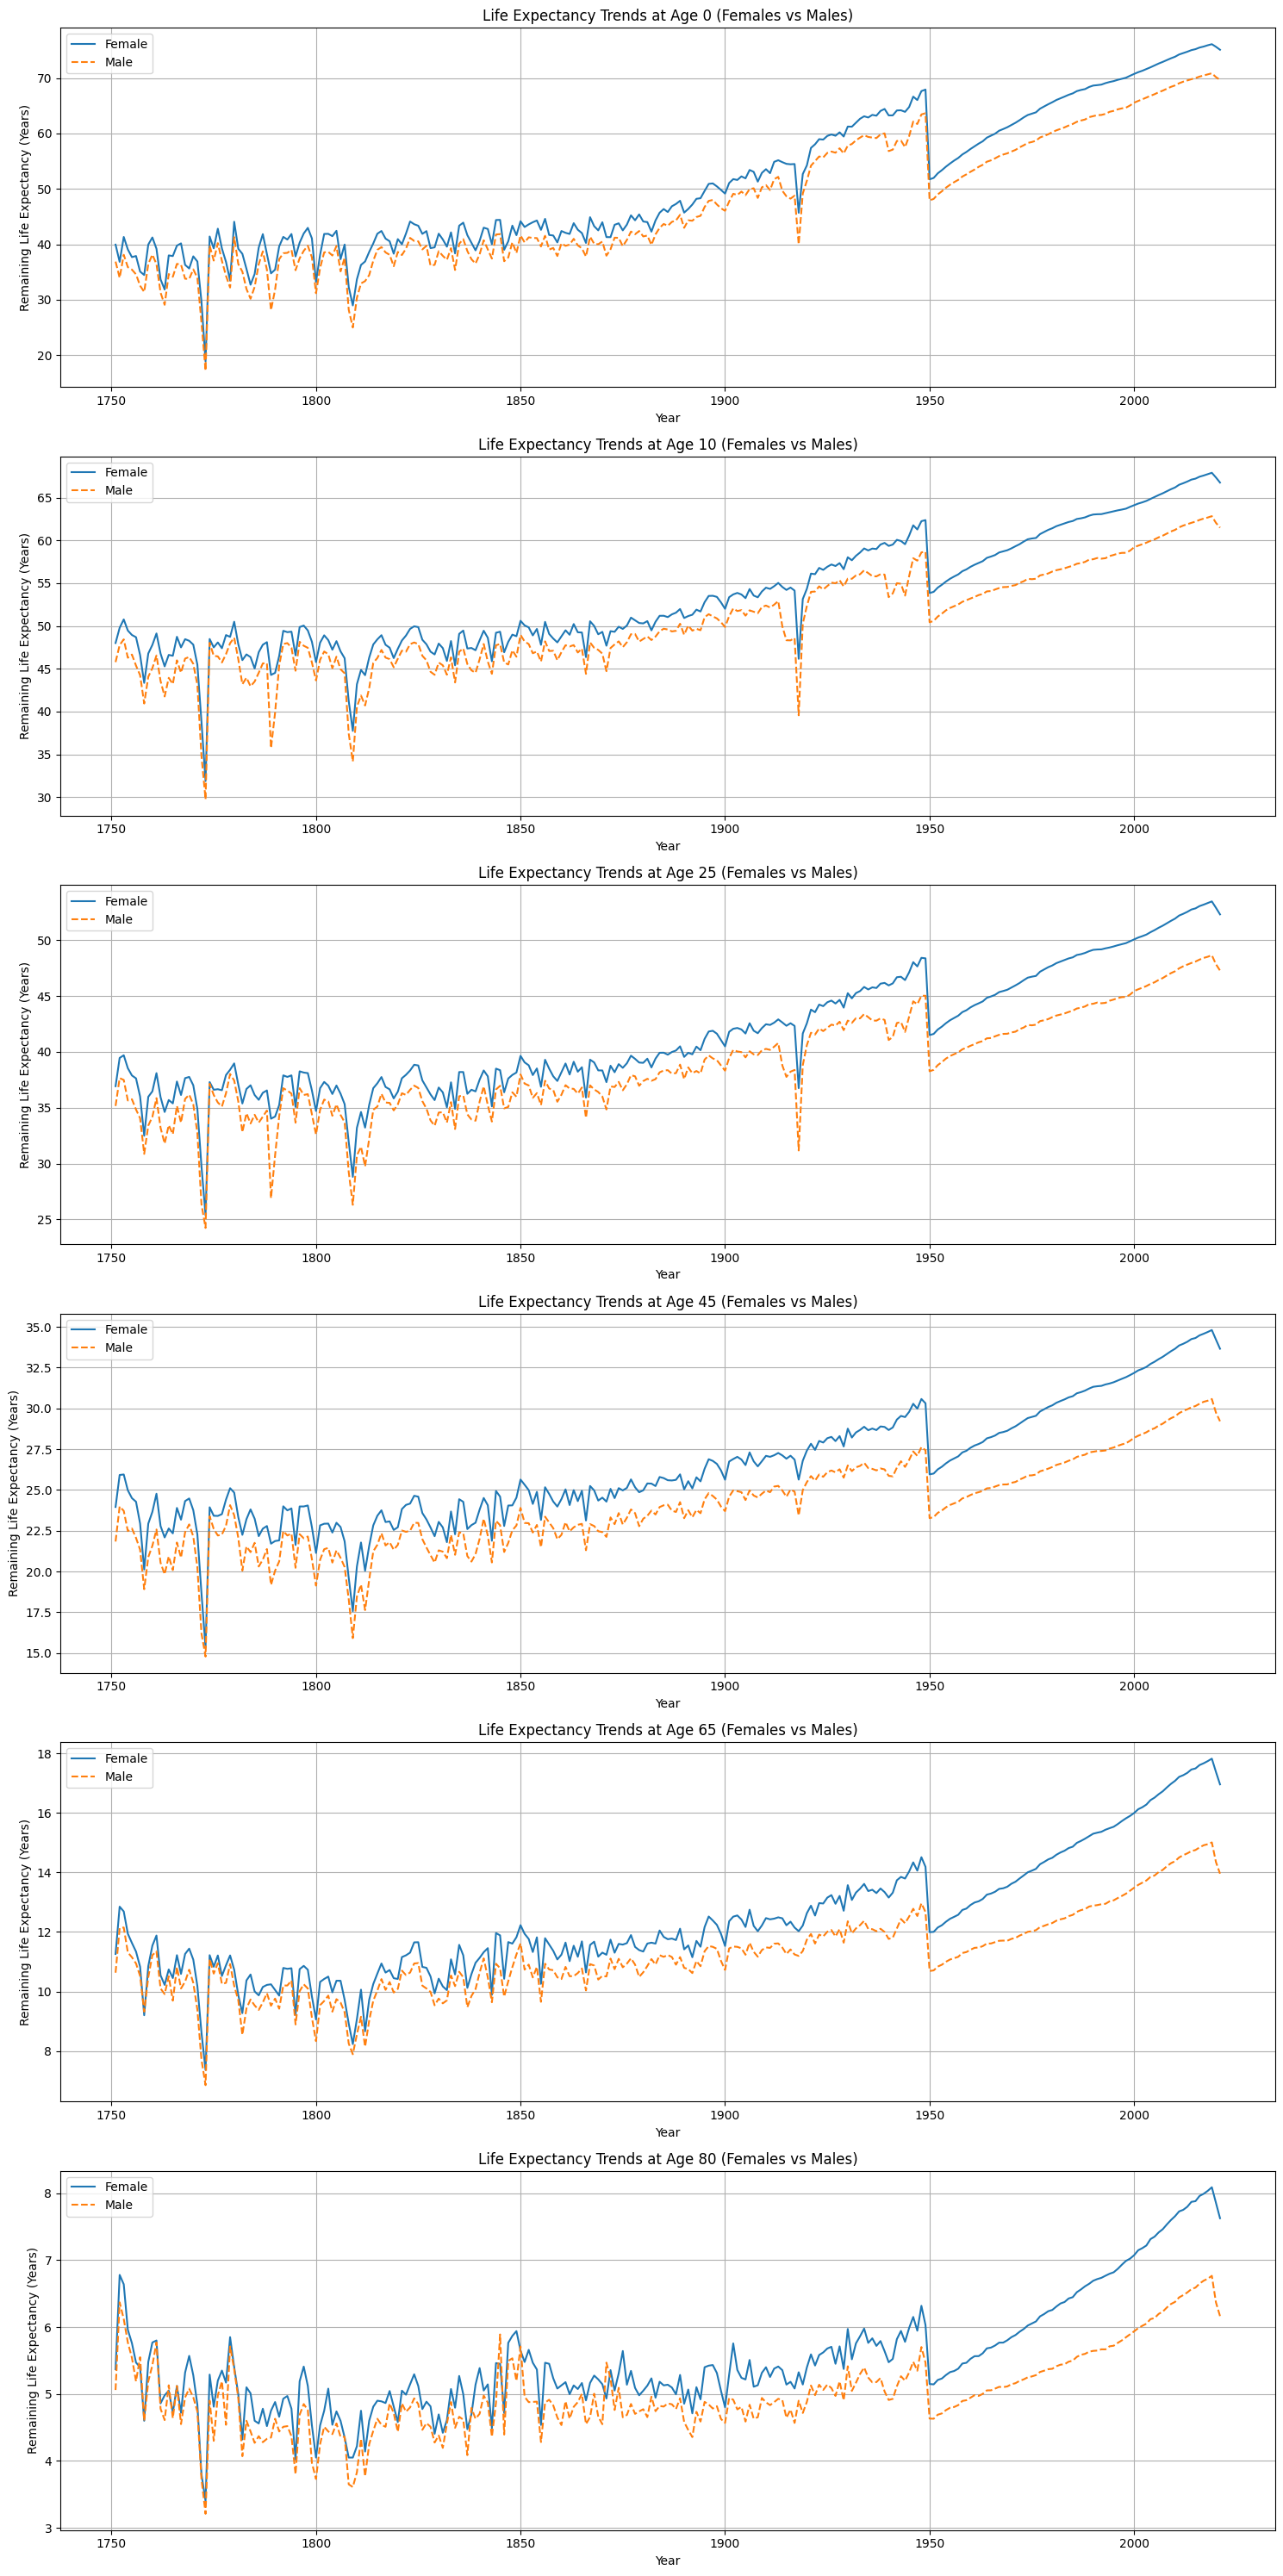

In [20]:
# Creating separate plots for each age group to compare trends between females and males

age_groups = ['0', '10', '25', '45', '65', '80']
num_plots = len(age_groups)
fig, axes = plt.subplots(num_plots, 1, figsize=(15, 5 * num_plots))

for i, age in enumerate(age_groups):
    # Extracting columns for the specific age group
    female_column = f'Life expectancy - Type: period - Sex: female - Age: {age}'
    male_column = f'Life expectancy - Type: period - Sex: male - Age: {age}'

    # Plotting the trends for females and males without confidence intervals
    sns.lineplot(ax=axes[i], data=df_cleaned, x='Year', y=female_column, label='Female', errorbar=None)
    sns.lineplot(ax=axes[i], data=df_cleaned, x='Year', y=male_column, label='Male', linestyle="--", errorbar=None)

    axes[i].set_title(f'Life Expectancy Trends at Age {age} (Females vs Males)')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Remaining Life Expectancy (Years)')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


## 1.2 Country/Region Comparison

C:\Users\svenl\AppData\Local\Temp\ipykernel_28188\2583934525.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


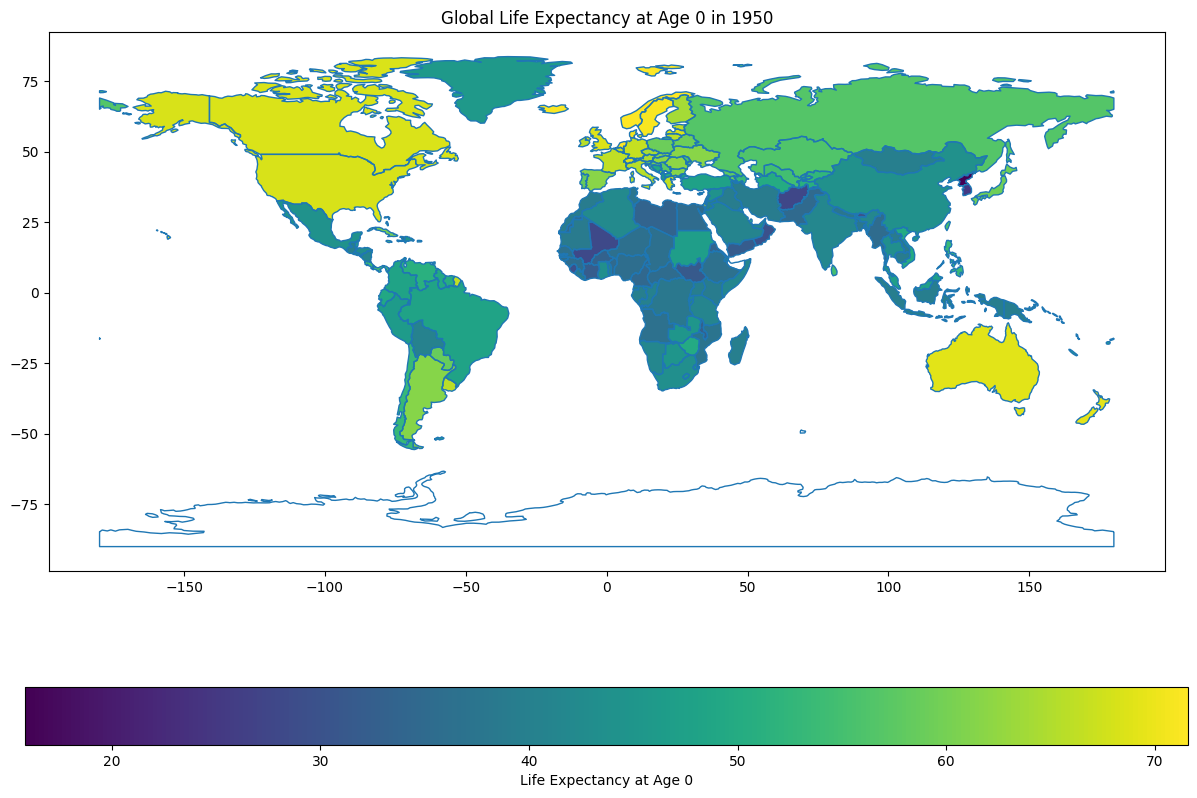

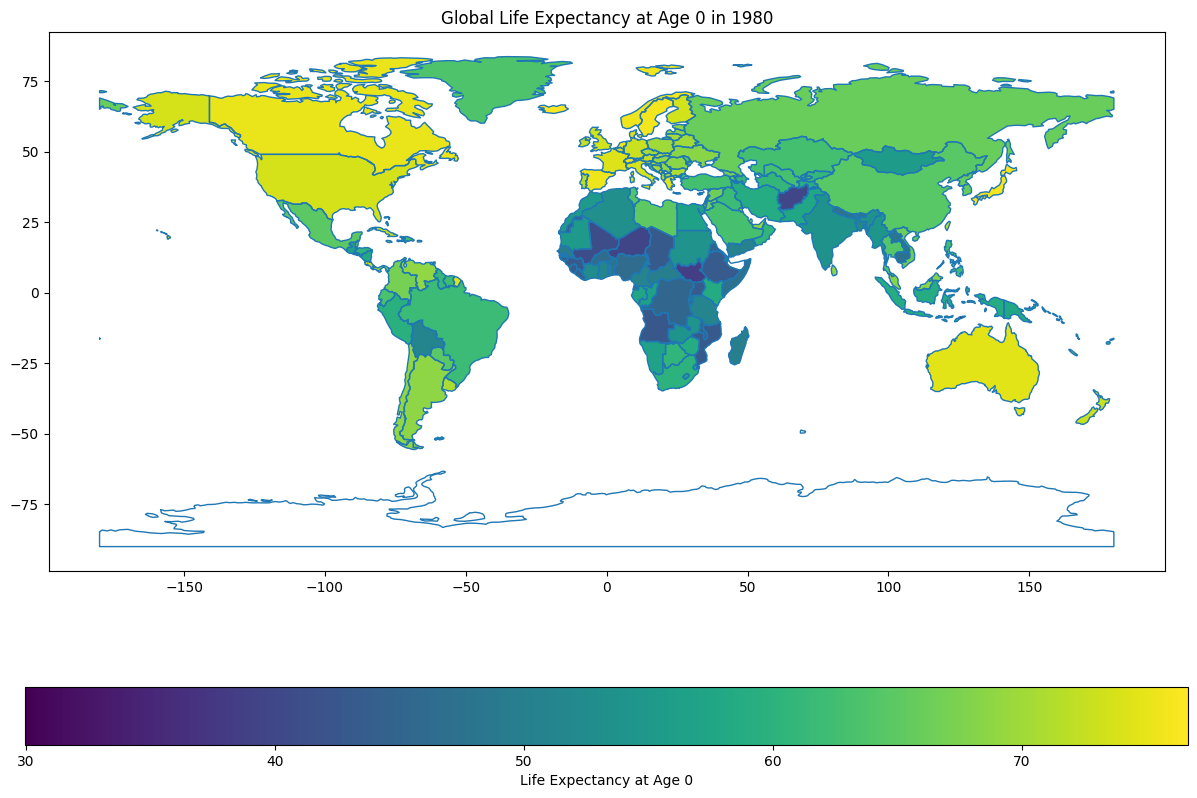

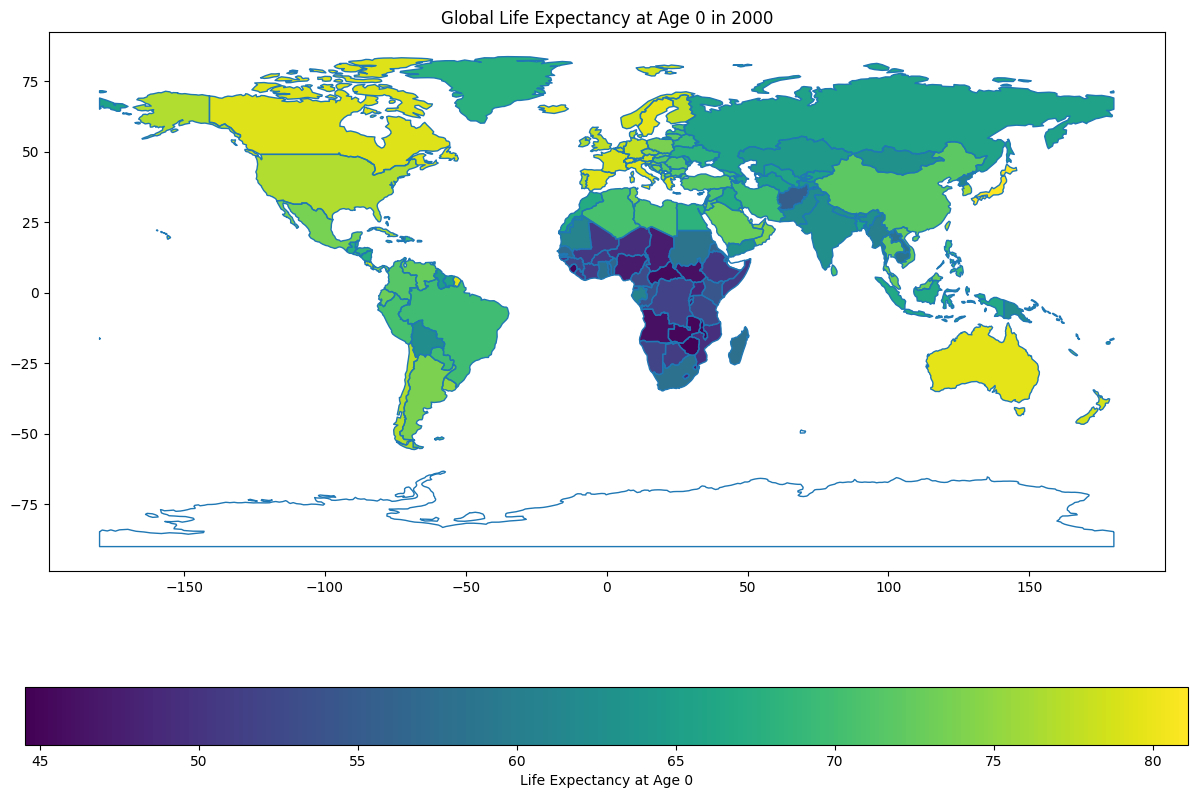

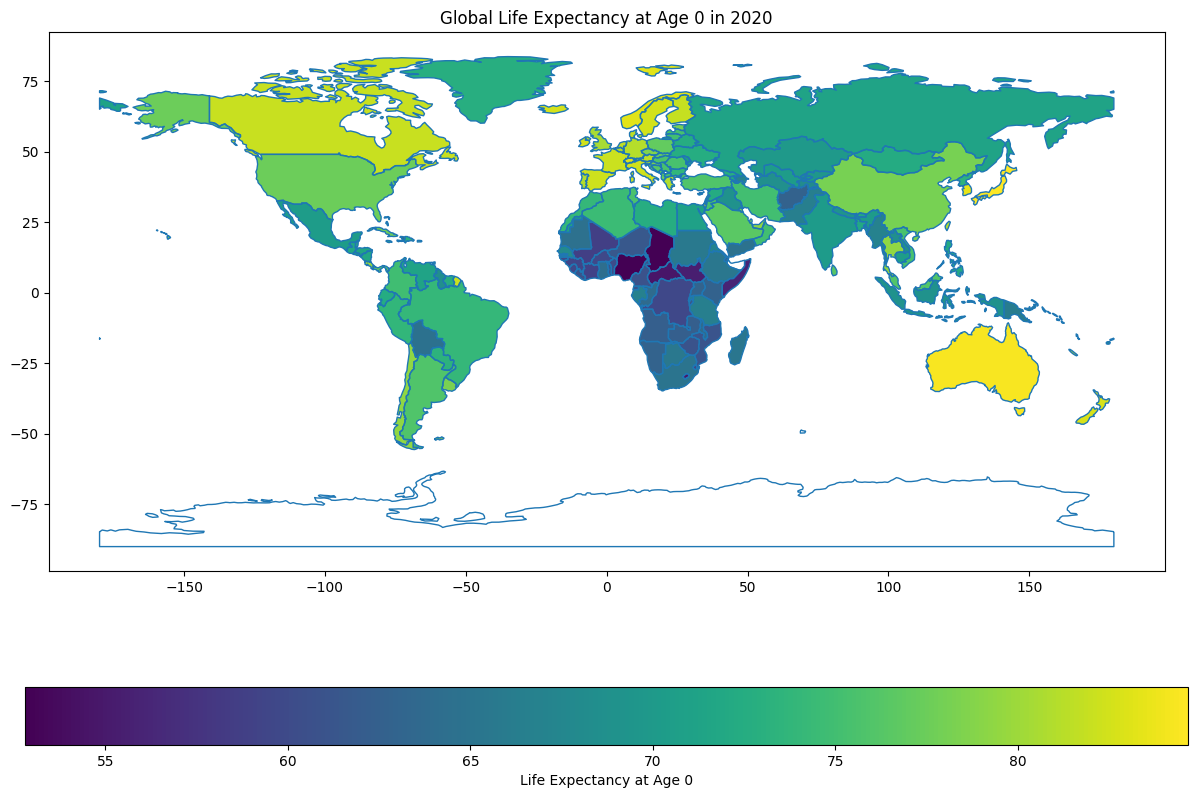

In [21]:

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define the years for maps
years = [1950, 1980, 2000, 2020]

for year in years:
    # Filter the DataFrame for the current year / .copy() to ensure working on a copy
    df_year = df_cleaned[df_cleaned['Year'] == year].copy()


    # Merging the life expectancy for females and males at age 0 into a single average value
    df_year['Life expectancy at age 0'] = df_year[['Life expectancy - Type: period - Sex: female - Age: 0',
                                                  'Life expectancy - Type: period - Sex: male - Age: 0']].mean(axis=1)

    # Merge the world map with the data
    world_merged = world.merge(df_year, left_on='iso_a3', right_on='Code', how='left')

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world.boundary.plot(ax=ax, linewidth=1)
    world_merged.plot(column='Life expectancy at age 0', ax=ax, legend=True, 
                      legend_kwds={'label': "Life Expectancy at Age 0", 'orientation': "horizontal"})
    plt.title(f'Global Life Expectancy at Age 0 in {year}')
    plt.show()

#### Univariate Method with Gaussian Distribution

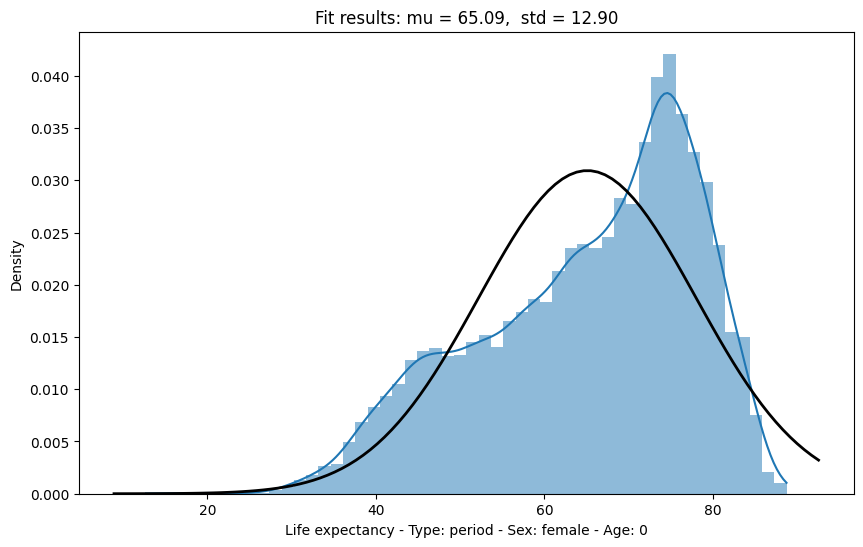

Number of data points: 18322


In [35]:
from scipy.stats import norm

# Gasussian Distribution for females
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Life expectancy - Type: period - Sex: female - Age: 0'], kde=True, stat="density", linewidth=0)

# Overlay with Gaussian fit
mean, std = norm.fit(df_cleaned['Life expectancy - Type: period - Sex: female - Age: 0'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = {:.2f},  std = {:.2f}".format(mean, std)
plt.title(title)

plt.show()

# Count the number of data points for male life expectancy at birth
data_point_count = df_cleaned['Life expectancy - Type: period - Sex: male - Age: 0'].count()

print(f"Number of data points: {data_point_count}")


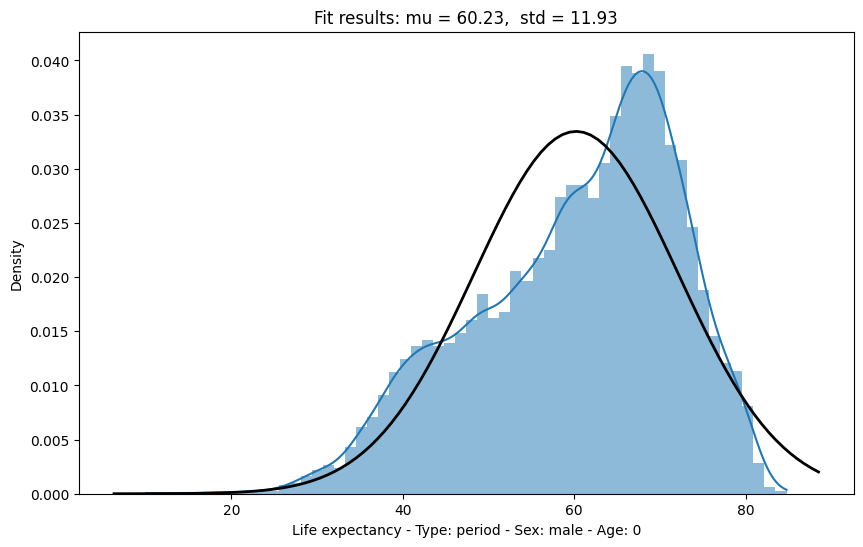

Number of data points: 18322


In [34]:
# Gasussian Distribution for males
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Life expectancy - Type: period - Sex: male - Age: 0'], kde=True, stat="density", linewidth=0)

# Overlay with Gaussian fit
mean, std = norm.fit(df_cleaned['Life expectancy - Type: period - Sex: male - Age: 0'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = {:.2f},  std = {:.2f}".format(mean, std)
plt.title(title)

plt.show()
# Count the number of data points for male life expectancy at birth
data_point_count = df_cleaned['Life expectancy - Type: period - Sex: male - Age: 0'].count()

print(f"Number of data points: {data_point_count}")
